**The cell below imports all necessary extensions**

In [1]:
import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
from pathlib import Path
import re

# Default plot configurations
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,8)
plt.rcParams['figure.dpi'] = 150
sns.set()

from IPython.display import display, Latex, Markdown

**The cell below reads in movies_metadata.csv**

In [2]:
data_dir = '.'
data_dir = Path('the-movies-dataset')
raw_data = pd.read_csv('/Users/anoglows/Documents/movieProject/the-movies-dataset/movies_metadata.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


**Add year and month columns**

In [3]:
raw_data['year'] = raw_data["release_date"].str.slice(0,4).astype(float)
raw_data['month'] = raw_data["release_date"].str.slice(5,7)#.astype(int)

In [4]:
raw_data.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,year,month
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,1995.0,10
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,1995.0,12
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,1995.0,12
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,1995.0,12
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,1995.0,02


**The cells below create our vectorized data**

In [5]:
raw_data.columns
good_data = raw_data.loc[:, ['belongs_to_collection', 'title', 'budget', 'id', 'imdb_id', 'popularity', 'year', 'month', 'release_date', 'revenue', 'budget', 'runtime', 'vote_average', 'vote_count']]

**The two cells below add genre information to our vectorized data**

In [6]:
genres_raw = (raw_data['genres']
        .str.replace('[','')
        .str.replace(']','')
        .str.replace('{','')
        .str.replace('}','')
        .str.replace("'id':" ,'')
        .str.replace("'name':" ,'')
        .str.replace('0','') 
        .str.replace('1','') 
        .str.replace('2','') 
        .str.replace('3','') 
        .str.replace('4','') 
        .str.replace('5','') 
        .str.replace('6','') 
        .str.replace('7','') 
        .str.replace('8','') 
        .str.replace('9','') 
        .str.replace(' ','') 
        .str.replace("'", '')
        .str.lower()
        .str.split(",")
)           
bad_genres = ['sciencefiction',
              'foreign',
              'tvmovie', 
              'carouselproductions', 
              'visionviewentertainment',
              'telescenefilmgroupproductions',
              'aniplex',
              'gohands',
              'brostatv',
              'mardockscrambleproductioncommittee',
              'sentaifilmworks',
              'odysseymedia',
              'pulserproductions',
              'roguestate',
              'thecartel'
             ]

genres = []
for i in genres_raw:
    for j in i:
        if j not in genres and j and j not in bad_genres:
            genres.append(j)


In [7]:
def add_genre(source, dest, genre):
    dest[genre] = source['genres'].str.contains(genre, case = False)
    dest[genre] = dest[genre].astype(int)
for genre in genres:
    add_genre(raw_data, good_data, genre)
#vector_data.head(5)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


**The cell below adds data if the movie is part of a collection**

In [8]:
good_data['collection'] = raw_data['belongs_to_collection'].notnull().astype(int)

In [9]:
no_budget = (good_data['budget'] == '0').astype(int).sum()
num_movies = good_data.count().max()

In [10]:
display(no_budget)
display(num_movies)
display(no_budget / num_movies)

budget    36573
budget    36573
dtype: int64

45466

budget    0.804403
budget    0.804403
dtype: float64

**From this data above, we can see that 80% of the movies do not have information for their budget in this dataset. For that reason, as of right now I am not going to include information on the budget in my analysis. I will take another look at this later**

In [11]:
no_revenue = (raw_data['revenue'] == 0.0).astype(int).sum()
display(no_revenue)
display(num_movies)
display(no_revenue / num_movies)

38052

45466

0.83693309286059914

**From this data above, we can see that 83% of the movies do not have information for their revenue in this dataset. For that reason, as of right now I am not going to include information on the revenue in my analysis. I will take another look at this later**

In [12]:
vote_counts = raw_data[raw_data['vote_count'].notnull()]['vote_count'].astype('int')
vote_averages = raw_data[raw_data['vote_average'].notnull()]['vote_average'].astype('int')

In [13]:
C = vote_averages.mean()
C

5.244896612406511

In [14]:
m = vote_counts.quantile(0.95)
m

434.0

In [15]:
def weighted_rating(x):
    v = x['vote_count']
    R = x['vote_average']
    return (v*R/(v+m)) + (m*C/(m+v))

In [27]:
def top_ranking(source = good_data, genre = None, count = 25, columns = None):
    if genre:
        dest = source[(source['vote_count'] >= m) & (source['vote_count'].notnull()) & (source['vote_average'].notnull()) & (source[genre] == 1)]
    else:
        dest = source[(source['vote_count'] >= m) & (source['vote_count'].notnull()) & (source['vote_average'].notnull())]
    if columns == 'all':
        dest = dest
    elif not columns:
        dest = dest[['title', 'year', 'vote_count', 'vote_average', 'popularity']]
    else:
        dest = dest[columns]
    dest['vote_average'] = dest['vote_average'].astype('int')
    dest['vote_count'] = dest['vote_count'].astype('int')
    dest['weighted_rating'] = dest.apply(weighted_rating, axis=1)
    dest = dest.sort_values('weighted_rating', ascending=False).reset_index(drop = True)
    dest.insert(0, 'rank', dest.index + 1)
    return(dest.head(count))




In [28]:
top25 = dict()
for genre in genres:
    top25[genre] = top_ranking(genre=genre)

In [29]:
top25['crime']

,rank,title,year,vote_count,vote_average,popularity,weighted_rating
0,1,The Dark Knight,2008.0,12269,8,123.167,7.905871
1,2,Pulp Fiction,1994.0,8670,8,140.95,7.868660
2,3,The Shawshank Redemption,1994.0,8358,8,51.6454,7.864000
3,4,The Godfather,1972.0,6024,8,41.1093,7.814847
4,5,Se7en,1995.0,5915,8,18.4574,7.811669
5,6,The Silence of the Lambs,1991.0,4549,8,4.30722,7.760041
6,7,Leon: The Professional,1994.0,4293,8,20.4773,7.747046
7,8,The Green Mile,1999.0,4166,8,19.9668,7.740062
8,9,Reservoir Dogs,1992.0,3821,8,12.2203,7.718986
9,10,The Godfather: Part II,1974.0,3418,8,36.6293,7.689586


In [30]:
for genre in genres:
    display(genre)
    display(top25[genre])

'animation'

,rank,title,year,vote_count,vote_average,popularity,weighted_rating
0,1,The Lion King,1994.0,5520,8,21.6058,7.799175
1,2,Spirited Away,2001.0,3968,8,41.0489,7.728370
2,3,Howl's Moving Castle,2004.0,2049,8,16.136,7.518439
3,4,Princess Mononoke,1997.0,2041,8,17.1667,7.516883
4,5,My Neighbor Totoro,1988.0,1730,8,13.5073,7.447452
5,6,Your Name.,2016.0,1030,8,34.461252,7.183255
6,7,Grave of the Fireflies,1988.0,974,8,0.010902,7.150771
7,8,Paperman,2012.0,734,8,7.19863,6.976272
8,9,Up,2009.0,7048,7,19.3309,6.898194
9,10,Inside Out,2015.0,6737,7,23.9856,6.893778


'comedy'

,rank,title,year,vote_count,vote_average,popularity,weighted_rating
0,1,Forrest Gump,1994.0,8147,8,48.3072,7.860656
1,2,Back to the Future,1985.0,6239,8,25.7785,7.820813
2,3,The Intouchables,2011.0,5410,8,16.0869,7.795394
3,4,The Grand Budapest Hotel,2014.0,4644,8,14.442,7.764530
4,5,Life Is Beautiful,1997.0,3643,8,39.395,7.706717
5,6,Dilwale Dulhania Le Jayenge,1995.0,661,9,34.457,7.511676
6,7,Dr. Strangelove or: How I Learned to Stop Worr...,1964.0,1472,8,9.80398,7.372657
7,8,Modern Times,1936.0,881,8,8.15956,7.090711
8,9,Some Like It Hot,1959.0,835,8,11.8451,7.057750
9,10,The Great Dictator,1940.0,756,8,9.24175,6.995198


'family'

,rank,title,year,vote_count,vote_average,popularity,weighted_rating
0,1,Back to the Future,1985.0,6239,8,25.7785,7.820813
1,2,The Lion King,1994.0,5520,8,21.6058,7.799175
2,3,Spirited Away,2001.0,3968,8,41.0489,7.728370
3,4,My Neighbor Totoro,1988.0,1730,8,13.5073,7.447452
4,5,It's a Wonderful Life,1946.0,1103,8,15.0316,7.222046
5,6,Paperman,2012.0,734,8,7.19863,6.976272
6,7,Harry Potter and the Philosopher's Stone,2001.0,7188,7,38.1872,6.900064
7,8,Up,2009.0,7048,7,19.3309,6.898194
8,9,Inside Out,2015.0,6737,7,23.9856,6.893778
9,10,Despicable Me,2010.0,6595,7,22.2745,6.891633


'adventure'

,rank,title,year,vote_count,vote_average,popularity,weighted_rating
0,1,Inception,2010.0,14075,8,29.1081,7.917588
1,2,Interstellar,2014.0,11187,8,32.2135,7.897107
2,3,The Lord of the Rings: The Fellowship of the Ring,2001.0,8892,8,32.0707,7.871787
3,4,The Lord of the Rings: The Return of the King,2003.0,8226,8,29.3244,7.861927
4,5,The Lord of the Rings: The Two Towers,2002.0,7641,8,29.4235,7.851924
5,6,Star Wars,1977.0,6778,8,42.1497,7.834205
6,7,Back to the Future,1985.0,6239,8,25.7785,7.820813
7,8,The Empire Strikes Back,1980.0,5998,8,19.471,7.814099
8,9,Spirited Away,2001.0,3968,8,41.0489,7.728370
9,10,Howl's Moving Castle,2004.0,2049,8,16.136,7.518439


'fantasy'

,rank,title,year,vote_count,vote_average,popularity,weighted_rating
0,1,The Lord of the Rings: The Fellowship of the Ring,2001.0,8892,8,32.0707,7.871787
1,2,The Lord of the Rings: The Return of the King,2003.0,8226,8,29.3244,7.861927
2,3,The Lord of the Rings: The Two Towers,2002.0,7641,8,29.4235,7.851924
3,4,The Green Mile,1999.0,4166,8,19.9668,7.740062
4,5,Spirited Away,2001.0,3968,8,41.0489,7.728370
5,6,Howl's Moving Castle,2004.0,2049,8,16.136,7.518439
6,7,Princess Mononoke,1997.0,2041,8,17.1667,7.516883
7,8,My Neighbor Totoro,1988.0,1730,8,13.5073,7.447452
8,9,It's a Wonderful Life,1946.0,1103,8,15.0316,7.222046
9,10,Avatar,2009.0,12114,7,185.071,6.939296


'romance'

,rank,title,year,vote_count,vote_average,popularity,weighted_rating
0,1,Forrest Gump,1994.0,8147,8,48.3072,7.860656
1,2,Dilwale Dulhania Le Jayenge,1995.0,661,9,34.457,7.511676
2,3,Vertigo,1958.0,1162,8,18.2082,7.250805
3,4,Your Name.,2016.0,1030,8,34.461252,7.183255
4,5,Some Like It Hot,1959.0,835,8,11.8451,7.057750
5,6,Cinema Paradiso,1988.0,834,8,14.177,7.057007
6,7,Paperman,2012.0,734,8,7.19863,6.976272
7,8,Sing Street,2016.0,669,8,10.672862,6.915943
8,9,Titanic,1997.0,7770,7,26.8891,6.907153
9,10,Silver Linings Playbook,2012.0,4840,7,14.4881,6.855572


'drama'

,rank,title,year,vote_count,vote_average,popularity,weighted_rating
0,1,The Dark Knight,2008.0,12269,8,123.167,7.905871
1,2,Interstellar,2014.0,11187,8,32.2135,7.897107
2,3,Fight Club,1999.0,9678,8,63.8696,7.881753
3,4,The Shawshank Redemption,1994.0,8358,8,51.6454,7.864000
4,5,Forrest Gump,1994.0,8147,8,48.3072,7.860656
5,6,The Godfather,1972.0,6024,8,41.1093,7.814847
6,7,The Imitation Game,2014.0,5895,8,31.5959,7.811074
7,8,The Lion King,1994.0,5520,8,21.6058,7.799175
8,9,The Intouchables,2011.0,5410,8,16.0869,7.795394
9,10,The Grand Budapest Hotel,2014.0,4644,8,14.442,7.764530


'action'

,rank,title,year,vote_count,vote_average,popularity,weighted_rating
0,1,Inception,2010.0,14075,8,29.1081,7.917588
1,2,The Dark Knight,2008.0,12269,8,123.167,7.905871
2,3,The Lord of the Rings: The Fellowship of the Ring,2001.0,8892,8,32.0707,7.871787
3,4,The Lord of the Rings: The Return of the King,2003.0,8226,8,29.3244,7.861927
4,5,The Lord of the Rings: The Two Towers,2002.0,7641,8,29.4235,7.851924
5,6,Star Wars,1977.0,6778,8,42.1497,7.834205
6,7,The Empire Strikes Back,1980.0,5998,8,19.471,7.814099
7,8,Scarface,1983.0,3017,8,11.2997,7.653516
8,9,Oldboy,2003.0,2000,8,10.6169,7.508745
9,10,Seven Samurai,1954.0,892,8,15.0178,7.098254


'crime'

,rank,title,year,vote_count,vote_average,popularity,weighted_rating
0,1,The Dark Knight,2008.0,12269,8,123.167,7.905871
1,2,Pulp Fiction,1994.0,8670,8,140.95,7.868660
2,3,The Shawshank Redemption,1994.0,8358,8,51.6454,7.864000
3,4,The Godfather,1972.0,6024,8,41.1093,7.814847
4,5,Se7en,1995.0,5915,8,18.4574,7.811669
5,6,The Silence of the Lambs,1991.0,4549,8,4.30722,7.760041
6,7,Leon: The Professional,1994.0,4293,8,20.4773,7.747046
7,8,The Green Mile,1999.0,4166,8,19.9668,7.740062
8,9,Reservoir Dogs,1992.0,3821,8,12.2203,7.718986
9,10,The Godfather: Part II,1974.0,3418,8,36.6293,7.689586


'thriller'

,rank,title,year,vote_count,vote_average,popularity,weighted_rating
0,1,Inception,2010.0,14075,8,29.1081,7.917588
1,2,The Dark Knight,2008.0,12269,8,123.167,7.905871
2,3,Pulp Fiction,1994.0,8670,8,140.95,7.868660
3,4,Se7en,1995.0,5915,8,18.4574,7.811669
4,5,The Imitation Game,2014.0,5895,8,31.5959,7.811074
5,6,The Silence of the Lambs,1991.0,4549,8,4.30722,7.760041
6,7,The Prestige,2006.0,4510,8,16.9456,7.758148
7,8,Leon: The Professional,1994.0,4293,8,20.4773,7.747046
8,9,Memento,2000.0,4168,8,15.4508,7.740175
9,10,The Shining,1980.0,3890,8,19.6116,7.723470


'horror'

,rank,title,year,vote_count,vote_average,popularity,weighted_rating
0,1,The Shining,1980.0,3890,8,19.6116,7.723470
1,2,Psycho,1960.0,2405,8,36.8263,7.578825
2,3,Alien,1979.0,4564,7,23.3774,6.847596
3,4,Split,2016.0,4461,7,28.920839,6.844389
4,5,Zombieland,2009.0,3655,7,11.063,6.813716
5,6,Aliens,1986.0,3282,7,21.7612,6.795018
6,7,The Conjuring,2013.0,3169,7,14.9017,6.788589
7,8,Get Out,2017.0,2978,7,36.894806,6.776754
8,9,Jaws,1975.0,2628,7,19.7261,6.751236
9,10,Shaun of the Dead,2004.0,2479,7,14.9029,6.738512


'history'

,rank,title,year,vote_count,vote_average,popularity,weighted_rating
0,1,The Imitation Game,2014.0,5895,8,31.5959,7.811074
1,2,Schindler's List,1993.0,4436,8,41.7251,7.754473
2,3,Saving Private Ryan,1998.0,5148,7,21.7581,6.863541
3,4,12 Years a Slave,2013.0,3787,7,30.3162,6.819542
4,5,Braveheart,1995.0,3404,7,20.7551,6.801533
5,6,Hacksaw Ridge,2016.0,3294,7,21.037699,6.795677
6,7,Dallas Buyers Club,2013.0,2973,7,14.7857,6.776427
7,8,The King's Speech,2010.0,2817,7,11.2604,6.765698
8,9,Spotlight,2015.0,2751,7,14.63239,6.760843
9,10,Dunkirk,2017.0,2712,7,30.938854,6.757878


'mystery'

,rank,title,year,vote_count,vote_average,popularity,weighted_rating
0,1,Inception,2010.0,14075,8,29.1081,7.917588
1,2,Se7en,1995.0,5915,8,18.4574,7.811669
2,3,The Prestige,2006.0,4510,8,16.9456,7.758148
3,4,Memento,2000.0,4168,8,15.4508,7.740175
4,5,Oldboy,2003.0,2000,8,10.6169,7.508745
5,6,Rear Window,1954.0,1531,8,17.9113,7.391494
6,7,Citizen Kane,1941.0,1244,8,15.8119,7.287417
7,8,Vertigo,1958.0,1162,8,18.2082,7.250805
8,9,Shutter Island,2010.0,6559,7,15.8136,6.891075
9,10,Gone Girl,2014.0,6023,7,154.801,6.882033


'war'

,rank,title,year,vote_count,vote_average,popularity,weighted_rating
0,1,The Imitation Game,2014.0,5895,8,31.5959,7.811074
1,2,Schindler's List,1993.0,4436,8,41.7251,7.754473
2,3,Apocalypse Now,1979.0,2112,8,13.5963,7.530356
3,4,The Pianist,2002.0,1927,8,14.8116,7.493556
4,5,Dr. Strangelove or: How I Learned to Stop Worr...,1964.0,1472,8,9.80398,7.372657
5,6,Grave of the Fireflies,1988.0,974,8,0.010902,7.150771
6,7,Band of Brothers,2001.0,725,8,7.903731,6.968322
7,8,Inglourious Basterds,2009.0,6598,7,16.8956,6.891679
8,9,Saving Private Ryan,1998.0,5148,7,21.7581,6.863541
9,10,300,2006.0,5092,7,18.1084,6.862158


'music'

,rank,title,year,vote_count,vote_average,popularity,weighted_rating
0,1,Sing Street,2016.0,669,8,10.672862,6.915943
1,2,La La Land,2016.0,4745,7,19.681686,6.852922
2,3,Beauty and the Beast,1991.0,3029,7,23.4335,6.780042
3,4,Pitch Perfect,2012.0,2310,7,11.0359,6.722407
4,5,Corpse Bride,2005.0,1957,7,12.92,6.681424
5,6,Les Misérables,2012.0,1925,7,13.5241,6.677103
6,7,Sweeney Todd: The Demon Barber of Fleet Street,2007.0,1745,7,10.0384,6.650429
7,8,Straight Outta Compton,2015.0,1381,7,21.1831,6.580322
8,9,Peter Pan,1953.0,1380,7,16.8615,6.580091
9,10,Dirty Dancing,1987.0,1371,7,14.0441,6.577997


'documentary'

,rank,title,year,vote_count,vote_average,popularity,weighted_rating
0,1,Citizenfour,2014.0,516,7,6.58422,6.198195
1,2,Amy,2015.0,482,7,11.1202,6.168434
2,3,Bowling for Columbine,2002.0,467,7,11.3939,6.154589
3,4,Blackfish,2013.0,456,7,5.49514,6.144141
4,5,Super Size Me,2004.0,520,6,5.2661,5.656483
5,6,Jackass 3D,2010.0,434,6,10.9975,5.622448


'western'

,rank,title,year,vote_count,vote_average,popularity,weighted_rating
0,1,"The Good, the Bad and the Ugly",1966.0,2371,8,16.7888,7.573720
1,2,Once Upon a Time in the West,1968.0,1160,8,15.5894,7.249865
2,3,Django Unchained,2012.0,10297,7,19.785,6.929017
3,4,The Revenant,2015.0,6558,7,23.5012,6.891059
4,5,The Hateful Eight,2015.0,4405,7,20.3288,6.842588
5,6,True Grit,2010.0,1701,7,10.7308,6.643225
6,7,Hell or High Water,2016.0,1304,7,12.565896,6.561729
7,8,Unforgiven,1992.0,1133,7,10.9421,6.513902
8,9,Dances with Wolves,1990.0,1084,7,11.6543,6.498212
9,10,For a Few Dollars More,1965.0,988,7,13.2953,6.464336


In [46]:
top1000 = top_ranking(count = 1000, columns ='all')
    


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

In [47]:
top1000

,rank,belongs_to_collection,title,budget,id,imdb_id,popularity,year,month,release_date,...,thriller,horror,history,mystery,war,music,documentary,western,collection,weighted_rating
0,1,NaN,Inception,160000000,27205,tt1375666,29.1081,2010.0,07,2010-07-14,...,1,0,0,1,0,0,0,0,0,7.917588
1,2,"{'id': 263, 'name': 'The Dark Knight Collectio...",The Dark Knight,185000000,155,tt0468569,123.167,2008.0,07,2008-07-16,...,1,0,0,0,0,0,0,0,1,7.905871
2,3,NaN,Interstellar,165000000,157336,tt0816692,32.2135,2014.0,11,2014-11-05,...,0,0,0,0,0,0,0,0,0,7.897107
3,4,NaN,Fight Club,63000000,550,tt0137523,63.8696,1999.0,10,1999-10-15,...,0,0,0,0,0,0,0,0,0,7.881753
4,5,"{'id': 119, 'name': 'The Lord of the Rings Col...",The Lord of the Rings: The Fellowship of the Ring,93000000,120,tt0120737,32.0707,2001.0,12,2001-12-18,...,0,0,0,0,0,0,0,0,1,7.871787
5,6,NaN,Pulp Fiction,8000000,680,tt0110912,140.95,1994.0,09,1994-09-10,...,1,0,0,0,0,0,0,0,0,7.868660
6,7,NaN,The Shawshank Redemption,25000000,278,tt0111161,51.6454,1994.0,09,1994-09-23,...,0,0,0,0,0,0,0,0,0,7.864000
7,8,"{'id': 119, 'name': 'The Lord of the Rings Col...",The Lord of the Rings: The Return of the King,94000000,122,tt0167260,29.3244,2003.0,12,2003-12-01,...,0,0,0,0,0,0,0,0,1,7.861927
8,9,NaN,Forrest Gump,55000000,13,tt0109830,48.3072,1994.0,07,1994-07-06,...,0,0,0,0,0,0,0,0,0,7.860656
9,10,"{'id': 119, 'name': 'The Lord of the Rings Col...",The Lord of the Rings: The Two Towers,79000000,121,tt0167261,29.4235,2002.0,12,2002-12-18,...,0,0,0,0,0,0,0,0,1,7.851924


In [48]:
topMonths = top1000.groupby('month').count()['rank']

Text(0.5,1,'Counts of number of movies released per month of the top 1000 movies in the dataset')

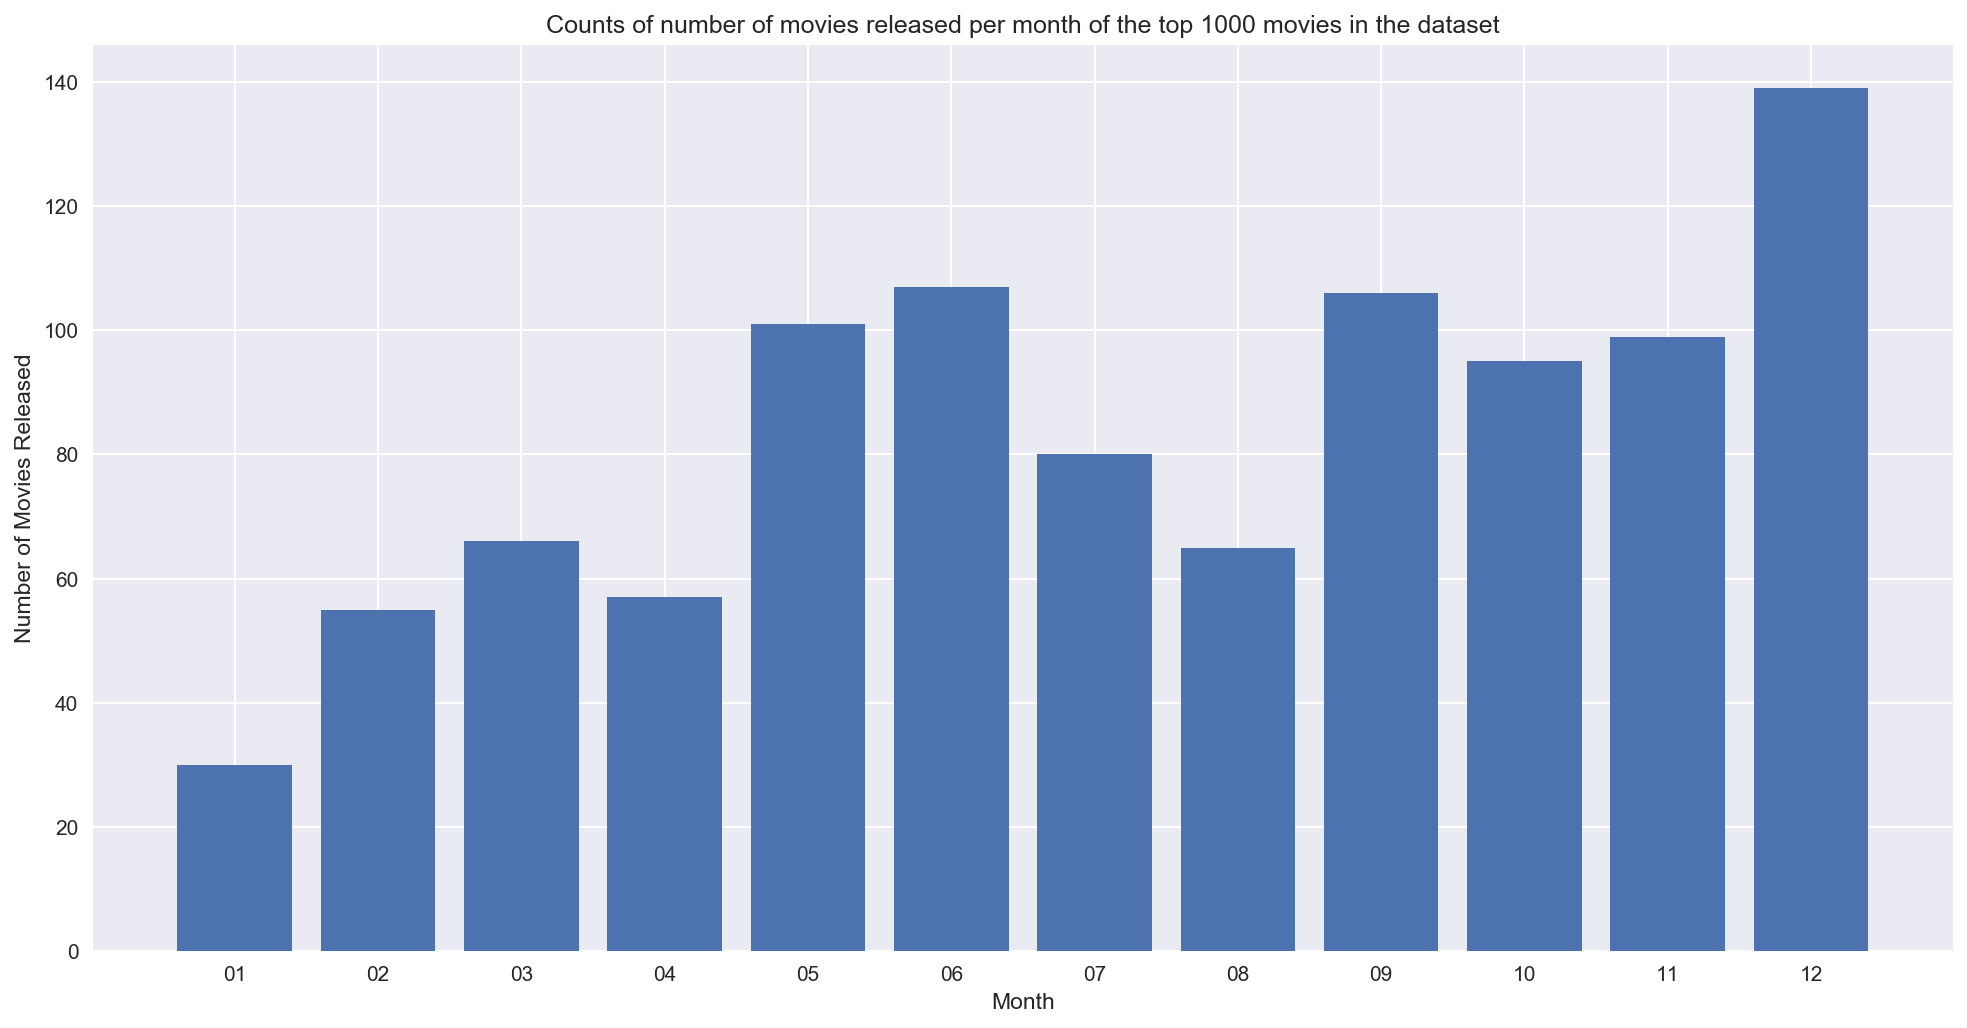

In [57]:
plt.figure()
plt.bar(topMonths.index, topMonths)
plt.xlabel('Month')
plt.ylabel('Number of Movies Released')
plt.title('Counts of number of movies released per month of the top 1000 movies in the dataset')

From this graph we can see that the most popular movies were released in December. Often times, blockbuster movies have a christmas release that fuels the box office and is before awards season. Also, we can see a spike in the amount of popular movies during May and June compared to the other summer months. Its interesting to see that January has the least amount of movies in the top 1000. This makes sense because I can't think of any movies that I have seen released in January.